In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

$rho_star/rho_crit = 1.904e-03$
Minima exist.


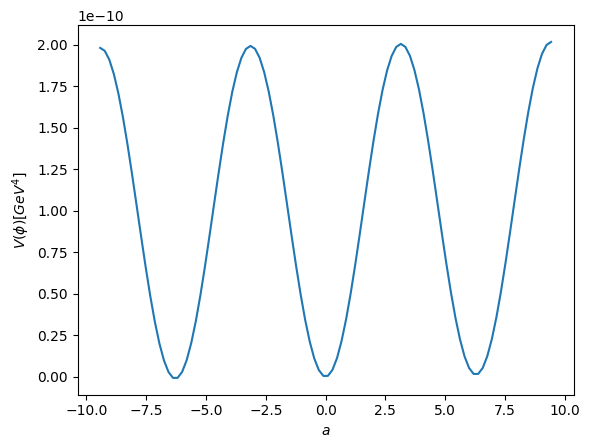

In [8]:
GeV4togCm3 = 2.30607e17 # GeV3 -> g.cm^(-3)
m_n = 0.939565 # in GeV
mu = m_n * 1e25 # in GeV
fa = 1e15 # GeV
ma = 1e-11 * 1e-9
Msun = 1.03972 * 10**57 # GeV
cmtoGeV = 1.98*10**-14
Rns = 1200000 /cmtoGeV # in GeV^-1
rho_const = 4.125e14/GeV4togCm3 # constant density star in GeV^4
radius0dim = ma*Rns
M_star = 4/3. * np.pi * (radius0dim/ma)**3 * rho_const

rho_crit = fa*mu*ma**2
stability = rho_const/rho_crit

print(f"$rho_star/rho_crit = {stability:0.3e}$")
if stability<1:
    print('Minima exist.')
else:
    print('Minima do not exist; entering the destabilization regime.')

def axion_potential(a):
    V_eff = ma**2 * fa**2 * (1-np.cos(a)) + (fa*a/mu)*rho_const
    return V_eff
a = np.linspace(-3*np.pi, 3*np.pi, 100)


plt.plot(a, axion_potential(a));
plt.xlabel(r'$a$')
plt.ylabel(r"$V(\phi)[GeV^4]$");


In [19]:
# Define the ODE system
def ode_system(r, a):
    """
    Define the system of ordinary differential equations (ODEs):
    
    Parameters:
    r : float
        Independent variable, typically representing a radial coordinate.
    a : array_like
        Dependent variables. a[0] is the function a(r), and a[1] is its derivative a'(r).

    Returns:
    list
        Derivatives of the dependent variables [a'(r), a''(r)].
    """
    return [a[1], np.where(r < radius0dim, -2*a[1]/r + np.sin(a[0]) + rho_const/rho_crit, -2*a[1]/r + np.sin(a[0]))]  # a[1] = a'(r) & a[0] = a(r)

# Define the boundary conditions
def boundary_conditions(a_initial, a_final):
    """
    Define the boundary conditions for the BVP.

    Parameters:
    a_initial : array_like
        The value of the dependent variables at the start of the integration interval.
    a_final : array_like
        The value of the dependent variables at the end of the integration interval.

    Returns:
    list
        Residuals of the boundary conditions.
    """
    return [a_initial[1],#a_initial[0] - ac,  # Boundary condition: a(r) = ac
            a_final[1]]      # Boundary condition: a'(r) = 0 # for a'(ri)=0 -> set a_initial[1] = 0  | for a'(rf) = 0 -> set a_final[0]


# class to stop the code when called
class StopExecution(Exception):
    def _render_traceback_(self):
        # Prevents the traceback from being printed
        pass

# Initial mesh and initial guess (linear)
ri, rf = 1e-15, 100 
n_steps = 1000
r = np.logspace(np.log10(ri), np.log10(rf), n_steps)
a_initial = np.zeros((2, r.size))  # Initialize the guess for the dependent variables
print(f'Integration starts from {ri*cmtoGeV/ma/100000:0.2e} km to {rf*cmtoGeV/ma/100000:0.2e}')

Integration starts from 1.98e-14 km to 1.98e+03


A solution is found!
Field central value ac = -2.3807e-04
a'(r_i) = 0.0000e+00
Field value outside a(r_f) = -4.3454e-46
a'(r_f) = 0.0000e+00


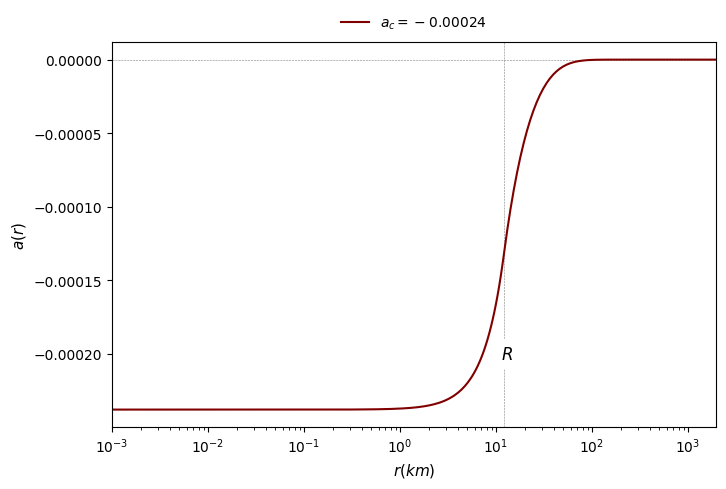

In [24]:
# Solve the BVP for different values of ac
solutions = []  # Initialize an empty list to store solutions
ac_initial_guess = -1e-3

a_initial[0, 0] = ac_initial_guess  # Set the initial guess for a(ri) based on ac value
sol = solve_bvp(ode_system, boundary_conditions, r, a_initial)  # Solve the BVP
if sol.success:
    solutions.append(sol)  # Store the solution if successful
    print("A solution is found!")
else:
    print('No solution found. Stopping the code here.')
    raise StopExecution    

##############################################################################################################
################################################# Outputs ####################################################

a_c = sol.y[0,0]
a_c_prime = sol.yp[0,0]
a_f = sol.y[0,-1]
a_f_prime = sol.yp[0,-1]
print(f"Field central value ac = {a_c:0.4e}")
print(f"a'(r_i) = {a_c_prime:0.4e}")
print(f"Field value outside a(r_f) = {a_f:0.4e}")
print(f"a'(r_f) = {a_f_prime:0.4e}")

##############################################################################################################
################################################# Plotting ###################################################
fig = plt.figure(figsize=(7.8, 5))
plt.plot(sol.x*cmtoGeV/ma/100000, sol.y[0], label=f'$a_c = {a_c:.5f}$', color = 'maroon')  # Plot each solution

plt.axhline(y=0, color='grey', linewidth=0.4, linestyle='dashed', zorder=0)
plt.axvline(x=radius0dim*cmtoGeV/ma/100000, color='grey', linewidth=0.4, linestyle='dashed', zorder=0)
plt.text(x=radius0dim*cmtoGeV/ma/100000+1, y=-0.0002, fontdict={'size':12}, s='$R$', ha='center', va='center',rotation='horizontal', backgroundcolor='white')

plt_low_lim = 1e-3
plt_upper_lim = 1980
plt.xlabel(r'$r(km)$', fontdict={'size':11})
plt.xlim(plt_low_lim, plt_upper_lim)  
plt.xscale('log')
plt.ylabel(r'$a(r)$', fontdict={'size':11})  
plt.legend(loc='center', bbox_to_anchor=(0.5,1.05), frameon=False)
fig.savefig("field_plot.pdf")
plt.show()  


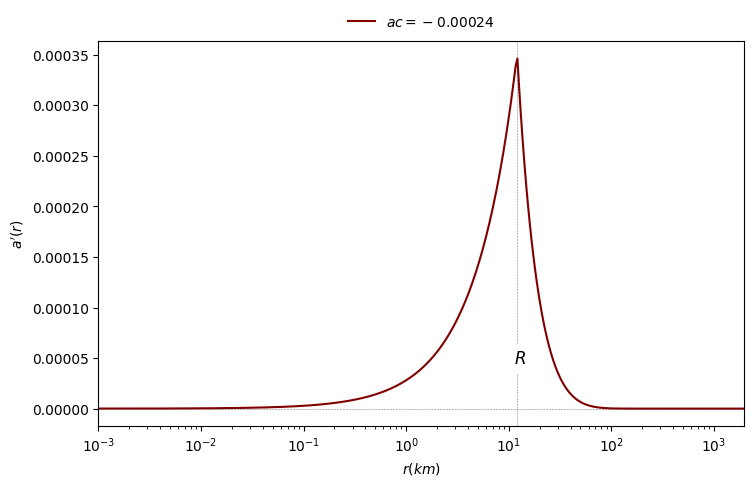

In [25]:
fig = plt.figure(figsize=(5*1.66667, 5))
plt.plot(sol.x*cmtoGeV/ma/100000, sol.y[1], label=f'$ac = {a_c:.5f}$', color = 'maroon')  # Plot each solution

plt.axhline(y=0, color='grey', linewidth=0.4, linestyle='dashed', zorder=0)
plt.axvline(x=radius0dim*cmtoGeV/ma/100000, color='grey', linewidth=0.4, linestyle='dashed', zorder=0)
plt.xlabel(r'$r(km)$')
plt.xlim(ri,rf)  
plt.xscale('log')
plt.xlim(plt_low_lim, plt_upper_lim)
plt.text(x=radius0dim*cmtoGeV/ma/100000+1, y=0.00005, fontdict={'size':12}, s='$R$', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
plt.ylabel(r"$a'(r)$")  
plt.legend(loc='center', bbox_to_anchor=(0.5,1.05), frameon=False)
fig.savefig("field_derivative_plot.pdf")
plt.show()

In [183]:
# notebook graveyard

#norm = matplotlib.colors.Normalize(vmin=min(central_ax_value), vmax=max(central_ax_value))
#c_map = matplotlib.cm.viridis
#s_m = plt.cm.ScalarMappable(cmap=c_map, norm=norm)

##cb=fig.colorbar(s_m, orientation = 'vertical', ax=plt.gca(), aspect = 25, pad = 0.02)
